**The canonical version of this is in `classical-orbital-elements/scripts/definition-of-argument-of-periapsis.py`.**

This Notebook is here for interactive experimentation.

In [1]:
import numpy as np
import plotly.graph_objects as go
from scipy.spatial.transform import Rotation as R

In [2]:
def arrow(start, end, fig=None, **kwargs):
    start_offset = kwargs.get("start_offset") or 0.98
    tip_ratio = kwargs.get("tip_ratio") or 0.1
    x_0, y_0, z_0 = start + start_offset * (end - start)
    u_0, v_0, w_0 = tip_ratio * (end - start)
    cone = go.Cone(
        x=[x_0],
        y=[y_0],
        z=[z_0],
        u=[u_0],
        v=[v_0],
        w=[w_0],
        showlegend=False,
        showscale=False,
        sizemode="absolute",
        sizeref=10,
        **kwargs.get("cone", {}),
    )
    coords = np.vstack((start, end))
    line = go.Scatter3d(
        x=coords[:, 0],
        y=coords[:, 1],
        z=coords[:, 2],
        mode="lines+text",
        line=kwargs.get("line"),
        text=["", "h"],
        textfont=dict(size=30, family="sans-serif", color="black"),
        textposition="top center",
    )
    if fig is not None:
        fig.add_trace(line)
        fig.add_trace(cone)
    else:
        return line, cone

In [3]:
colors = dict(
    green="rgb(102,194,165)",
    red="rgb(252,141,98)",
    blue="rgb(141,160,203)",
    pink="rgb(231,138,195)",
    lime="rgb(166,216,84)",
    yellow="rgb(255,217,47)",
)

In [40]:
a = 100
e = 0.4
b = a * np.sqrt(1 - e**2)
r_p = a * (1 - e)
p = a * (1 - e**2)

inclination = 30
raan = 30
omega = 0

rot = R.from_euler("ZY", [raan, inclination], degrees=True)

theta = np.arange(0, 2 * np.pi, step=0.01)
phi = 0
# https://math.stackexchange.com/a/819533
r = a * (1 - e**2) / (1 - e * np.cos(theta - phi))
x = r * np.cos(theta)
y = r * np.sin(theta)
z = np.zeros_like(x)
r = np.vstack((x, y, z)).T
rotated = rot.apply(r)

vector_scale = 100
h_vec = np.zeros((2, 3), dtype=float)
h_vec[1, 2] = vector_scale
rot_vec = rot.apply(h_vec)

periapsis = np.array(((0, 0, 0), (-r_p, 0, 0)))
peri_rot = rot.apply(periapsis)

plane_size = 100
plane = np.array(
    (
        (-plane_size, -plane_size, 0),
        (-plane_size, plane_size, 0),
        (plane_size, -plane_size, 0),
        (plane_size, plane_size, 0),
    )
)
inclination_range = np.arange(0, np.radians(inclination), step=0.01)
arc = (
    vector_scale
    / 2
    * np.vstack(
        (
            np.sin(inclination_range),
            np.zeros_like(inclination_range),
            np.cos(inclination_range),
        )
    ).T
)
arc_rot = R.from_euler("Z", [raan], degrees=True)
arc = arc_rot.apply(arc)
arc_2 = (
    -r_p
    * np.vstack(
        (
            np.cos(inclination_range),
            np.zeros_like(inclination_range),
            -np.sin(inclination_range),
        )
    ).T
)
arc_2 = arc_rot.apply(arc_2)
N_vec = np.cross([0, 0, 1], rot_vec[1, :])
N = np.linalg.norm(N_vec)
u_N = N_vec / N
node_line = np.vstack(
    (
        np.linspace(-100, 100, 2),
        u_N[1] / u_N[0] * np.linspace(-100, 100, 2),
        np.zeros(2),
    )
).T

nodes = np.array(((0, p, 0), (0, -p, 0)))
nodes = rot.apply(nodes)

raan_range = np.arange(0, np.radians(90 + raan), step=0.01)
raan_arc = (
    vector_scale
    / 2
    * np.vstack((np.cos(raan_range), np.sin(raan_range), np.zeros_like(raan_range))).T
)

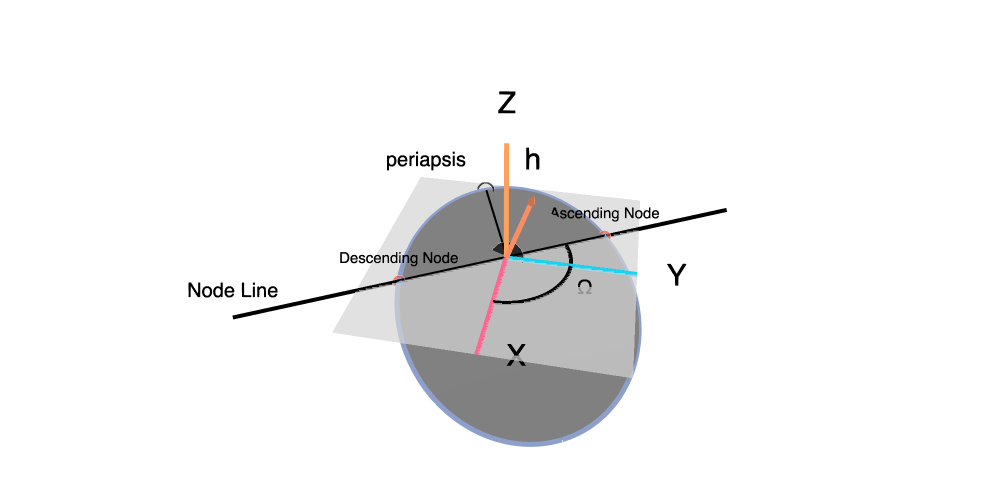

In [46]:
data = go.Scatter3d(
    x=rotated[:, 0],
    y=rotated[:, 1],
    z=rotated[:, 2],
    mode="lines",
    line=dict(color=colors["blue"], width=10),
)
d2 = go.Mesh3d(
    x=rotated[:, 0], y=rotated[:, 1], z=rotated[:, 2], color="gray", opacity=1.0
)

d3 = go.Mesh3d(
    x=plane[:, 0], y=plane[:, 1], z=plane[:, 2], opacity=0.7, color="lightgray"
)

d4 = go.Scatter3d(
    x=[0],
    y=[0],
    z=[0],
    mode="markers",
    marker=dict(color="black", size=[40], sizeref=1, sizemode="diameter"),
    text="m1",
    textfont=dict(size=30, family="sans-serif", color="black"),
    textposition="top right",
)
d5 = go.Scatter3d(
    x=[0, 0],
    y=[0, 0],
    z=[0, 100],
    mode="lines+text",
    line={"width": 10},
    text=["", "Z"],
    textfont=dict(size=30, family="sans-serif", color="black"),
    textposition="top center",
)
d6 = go.Scatter3d(
    x=[0, 0],
    y=[0, 100],
    z=[0, 0],
    mode="lines+text",
    line={"width": 10},
    text=["", "Y"],
    textfont=dict(size=30, family="sans-serif", color="black"),
    textposition="middle right",
)
d7 = go.Scatter3d(
    x=[0, 100],
    y=[0, 0],
    z=[0, 0],
    mode="lines+text",
    line={"width": 10},
    text=["", "X"],
    textfont=dict(size=30, family="sans-serif", color="black"),
    textposition="middle right",
)

mid = arc.shape[0] // 2
label = [""] * arc.shape[0]
label[mid] = "i"
arcline = go.Scatter3d(
    x=arc[:, 0],
    y=arc[:, 1],
    z=arc[:, 2],
    mode="lines+text",
    line={"width": 8, "color": "black"},
    text=label,
    textfont=dict(size=30, family="sans-serif", color="black"),
    textposition="top center",
)

arcline_2 = go.Scatter3d(
    x=arc_2[:, 0],
    y=arc_2[:, 1],
    z=arc_2[:, 2],
    mode="lines+text",
    line={"width": 8, "color": "black"},
    text=label,
    textfont=dict(size=20, family="sans-serif", color="black"),
    textposition="middle left",
)

periline = go.Scatter3d(
    x=peri_rot[:, 0],
    y=peri_rot[:, 1],
    z=peri_rot[:, 2],
    mode="lines+markers+text",
    line={"width": 8, "color": "black"},
    marker={"symbol": "circle-open", "size": [0, 20]},
    text=["", "periapsis"],
    textfont=dict(size=20, family="sans-serif", color="black"),
    textposition="top left",
)

nodeline = go.Scatter3d(
    x=node_line[:, 0],
    y=node_line[:, 1],
    z=node_line[:, 2],
    mode="lines+text",
    line={"width": 8, "color": "black"},
    text=["", "Node Line"],
    textfont=dict(size=20, family="sans-serif", color="black"),
    textposition="top center",
)

nodesmarks = go.Scatter3d(
    x=nodes[:, 0],
    y=nodes[:, 1],
    z=nodes[:, 2],
    mode="markers+text",
    marker={"size": [15, 15]},
    text=["Ascending Node", "Descending Node"],
    textfont=dict(size=15, family="sans-serif", color="black"),
    textposition="top center",
)
mid = raan_arc.shape[0] // 2
label = [""] * raan_arc.shape[0]
label[mid] = "Ω"
raanarc = go.Scatter3d(
    x=raan_arc[:, 0],
    y=raan_arc[:, 1],
    z=raan_arc[:, 2],
    mode="lines+text",
    line={"width": 8, "color": "black"},
    text=label,
    textfont=dict(size=20, family="sans-serif", color="black"),
    textposition="middle right",
)

layout = dict(
    width=600,
    height=500,
    autosize=False,
    xaxis={
        "showgrid": False,  # thin lines in the background
        "zeroline": False,  # thick line at x=0
        "visible": False,  # numbers below
    },
    yaxis={
        "showgrid": False,  # thin lines in the background
        "zeroline": False,  # thick line at x=0
        "visible": False,  # numbers below
    },
    scene=dict(
        hovermode=False,
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1,
            ),
            eye=dict(
                x=1.0707,
                y=-1.0707,
                z=1,
            ),
        ),
        # aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode="manual",
        xaxis={"showgrid": False, "zeroline": False, "visible": False},
        yaxis={"showgrid": False, "zeroline": False, "visible": False},
        zaxis={"showgrid": False, "zeroline": False, "visible": False},
    ),
    showlegend=False,
    margin={"b": 0, "t": 0, "r": 0, "l": 0},
)
fig = go.Figure(layout=layout)

fig.add_trace(data)
fig.add_trace(d2)
fig.add_trace(d3)
fig.add_trace(d4)
fig.add_trace(d5)
fig.add_trace(d6)
fig.add_trace(d7)
arrow(
    start=rot_vec[0, :],
    end=rot_vec[1, :],
    fig=fig,
    line={"width": 10.0, "color": colors["red"]},
    cone={"colorscale": [[0, colors["red"]], [1, colors["red"]]]},
)
# fig.add_trace(arcline)
# fig.add_trace(arcline_2)
fig.add_trace(periline)
fig.add_trace(nodeline)
fig.add_trace(nodesmarks)
fig.add_trace(raanarc)

fig.show()